28_SIR= 1 2 3
67_R0= 2.0365
77_Re= 1.9087 

139_i= 0 append前_init_coords= []
142_i= 0 append後_init_coords= [array([0., 0.])] 

106_i= 1 _whi= 0 _foi= 0 len(_init_co)= 2
106_i= 1 _whi= 1 _foi= 0 len(_init_co)= 2
106_i= 1 _whi= 2 _foi= 0 len(_init_co)= 2
131_i= 1 , whi= 2 , append前_len(self.persons)= 1
136_i= 1 , whi= 2 , append後_len(self.persons)= 2 

139_i= 1 append前_init_coords= [array([0., 0.])]
142_i= 1 append後_init_coords= [array([0., 0.]), array([0.20345944, 0.11087795])] 

106_i= 2 _whi= 0 _foi= 0 len(_init_co)= 2
106_i= 2 _whi= 1 _foi= 0 len(_init_co)= 2
106_i= 2 _whi= 2 _foi= 0 len(_init_co)= 2
106_i= 2 _whi= 2 _foi= 1 len(_init_co)= 2
225_i= 0 , whi= 0 , la= 1 , L2(persons[ 0 ]-persons[ 1 ]) =  0.2591289033048352 

225_i= 0 , whi= 0 , la= 2 , L2(persons[ 0 ]-persons[ 2 ]) =  0.2660331438266864 

286__i= 0 , whi= 0 , for_in= 2 

225_i= 0 , whi= 1 , la= 2 , L2(persons[ 1 ]-persons[ 2 ]) =  0.4112985469528969 

286__i= 0 , whi= 1 , for_in= 2 

286__i= 0 , whi= 2 , for_in= 2 

307

<ipython-input-2-b9ae217079fd>:389: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


432_k, len(self.persons)= 33 , 3
438_simu_k= 33 , for_in= 0 , persons[ 0 ]= <__main__.Person object at 0x00000176C6469A30> 

439_simu_k= 33 , for_in= 0 , persons[ 0 ].coords= [[ 0.          0.        ]
 [-0.01592227  0.01210295]
 [-0.03184454  0.0242059 ]
 [-0.04776681  0.03630884]
 [-0.06368908  0.04841179]
 [-0.07910784  0.05772036]
 [-0.08980432  0.04082109]
 [-0.1005008   0.02392182]
 [-0.11119728  0.00702255]
 [-0.12189376 -0.00987671]
 [-0.13259025 -0.02677598]
 [-0.14328673 -0.04367525]
 [-0.15398321 -0.06057452]
 [-0.16467969 -0.07747379]
 [-0.17537617 -0.09437306]
 [-0.18607265 -0.11127233]
 [-0.19676914 -0.1281716 ]
 [-0.20746562 -0.14507086]
 [-0.2181621  -0.16197013]
 [-0.22885858 -0.1788694 ]
 [-0.23955506 -0.19576867]
 [-0.25       -0.21266794]
 [-0.23930352 -0.22956721]
 [-0.22860704 -0.24646648]
 [-0.21791056 -0.25      ]
 [-0.20721407 -0.23310073]
 [-0.19651759 -0.21620146]
 [-0.18582111 -0.19930219]
 [-0.17512463 -0.18240293]
 [-0.16442815 -0.16550366]
 [-0.15373167 -

<ipython-input-2-b9ae217079fd>:521: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


514_A-graph 100.0% (33 / 34)


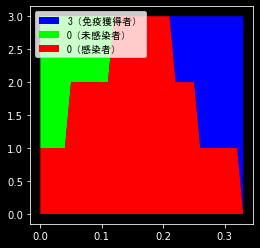

In [2]:
import numpy as np                      
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from enum import Enum, auto
from random import uniform, random
from math import cos, sin, pi, inf, sqrt
import os

this_dir = "C:\\Users\\na366\\Desktop\\Python\\SIR"
radius = 0.075
dt = 0.01
half = 0.25                # half =5
speed = 2
time_to_recover = 0.2    # time_to_recover =2
buff = 1                # buff = 300

#                                            図.
fig = plt.figure(figsize=plt.figaspect(1/1))
#                                            図の背景色は黒.
fig.set_facecolor('black')
    

class State(Enum):
    Susceptible = auto()
    Infected = auto()
    Recovered = auto()
    print("28_SIR=",Susceptible,Infected,Recovered)


class Person:
    
    def __init__(self,co,state,standstill):
        
        self.co = co
        # 118 _self.persons.append(Person(co,state,standstill))
        
        self.coords = np.array([self.co])    # 座標列
        # 124  _init_coords.append(init_co)
        
        self.arg = uniform(-pi, pi)
        self.standstill = standstill    # 停止 ⇒ True_or_Furse
        
        if self.standstill:
            vel = np.array([0.0, 0.0])    # 停止 ⇒ True ⇒ vel[x_0,y_0]
        else:
            vel = np.array([speed * cos(self.arg), speed * sin(self.arg)])
            
        self.vel = vel        # [0,0]_or_[Vx ,Vy]
        
        self.state = state        # S,I,R
        self.infection_start = inf    # 感染源 I_start_i(時間index)
        
    def move(self):
        if self.standstill:
            self.vel = np.array([speed * cos(self.arg), speed * sin(self.arg)])
            
class Population:
    
    def __init__(self,number,comeback,p=None):
        
        # 230_Population(numbe =10   ,comeback =True,  p =0.5)
        self.number = number
        self.R0 = (radius * (sqrt(2) * speed) * time_to_recover * self.number) / (half ** 2)
        # print("R0: %5.3f" % self.R0)
        self.R0a=format(self.R0, '1.4f')
        print("67_R0=",self.R0a)
        
        self.persons = []
        self.p = p
        init_coords = []
        
        if self.p is not None:
            self.Re = (1.0 - self.p) * (1.0 + (sqrt(2) - 1) * self.p) * self.R0
            # print("Re: %f" % self.Re)
            self.Rea=format(self.Re, '1.4f')
            print("77_Re=",self.Rea,"\n")
            
        for i in range(self.number):    # [0,1,2,,]順に代入
            
            if i == 0:
                
                init_co = np.array([0.0, 0.0])
                
                infected = Person(co=init_co,
                                  state=State.Infected,
                                  standstill=False)
                
                self.persons.append(infected)
                # persons=[]に、[0]追加
                
                infected.infection_start = 0
                # persons[0]の、感染した時間index = 0
                
            else:
                whi=0
                while True:
                    init_co = np.array([uniform(-half, half), uniform(-half, half)])
                    
                    appropriate = True
                    
                    # 71_init_coords = []
                    foi=0
                    for pre_init_co in init_coords:
                        
                        print("106_i=",i,"_whi=",whi,"_foi=",foi,"len(_init_co)=",len(init_co))

                        #                     uniform()-[]
                        dist = np.linalg.norm(init_co - pre_init_co, ord=2)
                        if dist <= 3 * radius:
                            appropriate = False
                            
                        if appropriate == False:
                            break
                            
                        foi+=1
                        
                    if appropriate:    # False,は,while(座標作,重り)繰返し
                        break
                        
                    whi+=1
                    
                if self.p is None:
                    standstill = False
                elif 1.2*random() < self.p:
                    standstill = True
                else:
                    standstill = False
                    
                if i<=1:
                    print("131_i=",i,", whi=",whi,", append前_len(self.persons)=",len(self.persons))
                self.persons.append(Person(co=init_co,
                                           state=State.Susceptible,
                                           standstill=standstill))
                if i<=1:
                    print("136_i=",i,", whi=",whi,", append後_len(self.persons)=",len(self.persons),"\n")
                    
            if i<=1:
                print("139_i=",i,"append前_init_coords=",init_coords)
            init_coords.append(init_co)
            if i<=1:
                print("142_i=",i,"append後_init_coords=",init_coords,"\n")
        
        if i==1:
            print("145_i=",i,"_init_coords= ",init_coords)
            print("146_i=",i,"_len(self.persons)=",len(self.persons))
            print("147_i=",i,"_vars(self.persons)=",vars(self.persons[0]))
            print("148_i=",i,"_self.persons[0].coords=",self.persons[0].coords,"\n")
        
        self.times = np.array([0])
        self.zeros = np.array([0])
        self.I = np.array([1])
        self.S = np.array([self.number - 1])
        self.R = np.array([0])
        
        self.comeback = comeback
        
        
    def simulate_sir(self,threshold=1):    # 閾値=1 ← 2
        
        i = 0                        # 時間の index.
        
        exceeded_threshold = False    # 感染者数が閾値（threshold）を超えた(exceeded)か否か.
        comebacked = False    # 行動制限を解除したか否か.
        subsided = None    # 感染が収束した時の時間のインデックス.
        
        # 感染収束 subsided + バッファ =時間インデックスself.end ⇒ def_simulate_sir
        # 338、で while が、brake
        while True:
            
            # 感染始 I⇒回復時間 time_to_recover⇒免疫獲得 R 動再開
            # 正方形 Box 壁に当り 反射
            
            # [object列,0,1,2,,]順に代入
            foi=0
            for person in self.persons:
                
                if (i - person.infection_start) * dt > time_to_recover:
                    
                    # time_index - object_要素(感染始time_index)*0.01> 0.05
                    person.state = State.Recovered    # 要素state_I⇒R
                    
                # vel[Vx,Vy]×dt(0.01)=[xdt,ydt]=[Δx,Δy] ,座標値 co+Δ
                person.co += dt * person.vel
                
                # ｘ+Δxで、壁反射.
                if abs(person.co[0]) > half:
                    person.co[0] = np.sign(person.co[0]) * half
                    person.vel[0] *= -1
                # ｙ+Δｙで、壁反射.
                if abs(person.co[1]) > half:
                    person.co[1] = np.sign(person.co[1]) * half
                    person.vel[1] *= -1
                    
                foi+=1
                
            indices = list(range(self.number))    # [0,1,2,3,4]
            
            whi=0
            
            comebacke_i_point=0
            
            while len(indices) > 0:    # [0,1,2,] → popで[1,2,]
                
                # pop 指定位置(k)の要素を削除し、削除した要素の値を取得
                
                k = indices.pop(0)        # 列の先頭[0]→[1]に変わる
                
                person = self.persons[k]
                
                for la in indices:            # [1,2,3,4]→ pop後[2,3,4],[3,4],[4],[-]Fulse
                    
                    other = self.persons[la]    # 順に代入[1]～[4]→while_[2]～[4]
                    vec = person.co - other.co
                    dist = np.linalg.norm(vec, ord=2)
                    
                    if i<=1:
                        print("225_i=",i,", whi=",whi,", la=",la,", L2(persons[",k,"]-persons[",la,"]) = ",dist,"\n")
                        
                    # person と other の距離が 2 *（半径）
                    # より小さいとき接触したと判定.
                    # 簡単のため 3 人以上の同時接触は考えない.
                    
                    if 0 < dist < 2 * radius:
                        
                        normal = vec / dist
                        
                        # _normal= vec/dist= [Δx/L2,Δy/L2]
                        # person と other が重ならないようにするための補正（correction）.
                        
                        correction = (radius - (dist / 2)) * normal
                        person.co += correction
                        other.co -= correction
                        
                        # 補正後検証
                        # vec = person.co - other.co
                        # dist = np.linalg.norm(vec, ord=2)
                        # print("220_dist-L2=",dist-2*radius)
                        
                        # 物理的な完全弾性衝突の場合は
                        #  person.vel = 止[0,0] _or_ 動[Vx ,Vy]
                        # ベクトルの内積 dot(a,b)
                        
                        person.vel -= (2 * np.dot(person.vel, normal)) * normal
                        # print("226_i-whi",i,"-",whi,"_内積 dot(porson.vel,normal)=",np.dot(person.vel, normal))
                        # 226_i-whi 2 - 0 _内積 dot(porson.vel,normal)= 1.8731217919647254
                        
                        # 物理的な完全弾性衝突の場合は                        
                        other.vel -= (2 * np.dot(other.vel, normal)) * normal
                        
                        # print("232_i-whi",i,"-",whi,"_内積 dot(other.vel, normal)=",np.dot(other.vel, normal))
                        # 232_i-whi 2 - 0 _内積 dot(other.vel, normal)= -1.9998062673706243
                        
                        # print("235_i-whi",i,"-",whi,"_remove前_indices",indices)
                        # 235_i-whi 2 - 0 _remove前_indices [1, 2]
                        
                        # 指定した値と同じ要素を検索し、最初の要素を削除
                        
                        indices.remove(la)        # 要素を指定して削除
                        
                        # print("242_i-whi",i,"-",whi,"_ indices.remove(",la,")後=",indices,"\n")
                        # 242_i-whi 2 - 0 _ indices.remove( 1 )後= [2] 
                        
                        # 感染状態を必要であれば変化させる.
                        
                        if person.state == State.Infected and other.state == State.Susceptible:
                            other.state = State.Infected
                            other.infection_start = i
                            
                        elif person.state == State.Susceptible and other.state == State.Infected:
                            person.state = State.Infected
                            person.infection_start = i
                            
                        break
                        
                    # if_
                # for_in
                if i<=1:
                    print("286__i=",i,", whi=",whi,", for_in=",la,"\n")
                #  _while len(indices) > 0: のカウント whi_indexを一つ進める
                
                whi+=1
            # このline後の、whi_は、3
            # while_True_時間の index を一つ進める
            
            i += 1
            
            S = 0    # 総未感染者数
            I = 0    # 総感染者数
            R = 0    # 総免疫獲得者数
            
            whfo=0
                
            for person in self.persons:
                
                # 各人間に対し, 現在の座標を追加記憶させる.
                # 2次元縦方向(vertical),axis=0,行方向連結
                
                person.coords = np.vstack([person.coords, person.co])
                print("307_ i=",i,",I==0_whfo=",whfo,",vstack→len(person.coords)=",len(person.coords))
                
                if person.state == State.Infected:
                    I += 1
                elif person.state == State.Susceptible:
                    S += 1
                elif person.state == State.Recovered:
                    R += 1
                                        
                whfo+=1
                
            # 3,総感染者数 I > 感染者数の閾値（threshold =1）
            #    exceeded_threshold =True.
            
            if threshold < I and not exceeded_threshold:
                exceeded_threshold = True
                
            # 行動制限を解除する場合
            # 1,self.comeback =True
            # 2,行動制限中 comebacked =Furse
            # 3,exceeded_threshold =True
            # その後
            # 1,総感染者数 I <= 感染者数の閾値 threshold = 2
            # 2,停止させている人間は全て動かす ← 行動制限を解除
                        
            comebacked_1 =I <= threshold and self.comeback and not comebacked and exceeded_threshold
            
            if comebacked_1:
                if comebacke_i_point > i:
                    break
                    
                for person in self.persons:
                    person.move()             # 行動制限解除
                    
                comebacked = True
                comebacke_i_point=i
                
                print("337_ comebacke_i_point=",comebacke_i_point,"\n")
                
            # I=1 開始 ⇒ I=0 感染収束,時間 index_i = subsided_沈静化
            
            if I == 0 and subsided is None:
                subsided = i
            if I==0:
                print("351_感染者_I==0 ,Simulating SIR %d (S: %d, I: %d, R: %d)" % (i, S, I, R))
                
            # それぞれの数値計算結果を記憶.
            self.times = np.append(self.times, i * dt)
            self.zeros = np.append(self.zeros, 0)
            self.I = np.append(self.I, I)
            self.S = np.append(self.S, S)
            self.R = np.append(self.R, R)        # 136_self.R = np.array([0])
            if I == 0:
                print("356_self.R=",self.R,"\n")
                
            # 感染収束時の時間の index が subsided に記憶されており,
            # 時間の index（= i）= subsided +バッファ
            #  ⇒ シミュレーションを終了 break
            
            if subsided is not None and i == subsided + buff:
                self.end = i
                # self.end_1=50
                print("\n 369_self.end=",self.end,"\n")
                
                print("371_len(self.persons)=",len(self.persons))
                print("372_len(self.persons[0].co)=",len(self.persons[0].co))
                print("373_len(self.persons[0].coords)=",len(self.persons[0].coords))
                print("374_len(self.persons[0].vel)=",len(self.persons[0].vel))
                print("375_self.persons[0].state)=",self.persons[0].state,"\n")
                
                break
                
                
    def animate( self ):
        
        def simulate(k):
            
            plt.cla()
            
            # 目盛りの数値 & 目盛りを消去.
            plt.tick_params(labelbottom=False,
                            labelleft=False,
                            labelright=False,
                            labeltop=False,
                            bottom=False,
                            left=False,
                            right=False,
                            top=False)
            
            ax = fig.add_subplot()
            
            # 正方形 Box の枠の色は白色で設定.
            ax.spines['top'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.spines['left'].set_color('white')
            ax.spines['right'].set_color('white')
            
            # x の範囲は -half ~ half まで.
            ax.set_xlim(-half, half)
            
            # y の範囲は -half ~ half まで.
            ax.set_ylim(-half, half)
            
            # アスペクト比は等しく設定.
            ax.set_aspect('equal')
            
            # 背景色は黒で設定.
            ax.set_facecolor('black')
            
            # 各人間を, 感染が始まっていない場合には緑色の粒子で,
            # 感染している場合には赤色の粒子で,
            # 免疫獲得している場合には青色の粒子で,
            
#,348,,,def simulate(k):
#,461,,,1,シミュレーションのアニメーションを作成.散布図
#,462,,,,,,,animate(update=simulate, end=self.end, name=simula_name)    
#            　　　　　　　　　　　　-------------
            # 時間の index が < k > の時 の各人間の座標の位置に描画.
            # self.persons を、<for person in> で、self.end 回 代入
            
            # 38__self.coords = np.array([self.co])
            # 140___print(_self.persons[0].coords
            # 281__person.coords = np.vstack([person.coords, person.co])
            
            if k >= self.end-1:
                print("432_k, len(self.persons)=",k,(","),len(self.persons))            
                            
            foi=0
            for person in self.persons:
                
                if k >= self.end-1:
                    print("438_simu_k=",k,", for_in=",foi,", persons[",foi,"]=",person,"\n")
                    print("439_simu_k=",k,", for_in=",foi,", persons[",foi,"].coords=",person.coords,"\n")
                    
                if k < person.infection_start:
                    # print("i= ",k,"person.state(1)=",person.state.value)
                    # この時は未感染状態.
                    circ = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=radius,
                                          fc='lime')
                    
                elif person.infection_start <= k <= person.infection_start + time_to_recover / dt:
                    # print("i= ",k,"person.state(2)=",person.state.value)
                    # この時は感染状態.
                    circ = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=radius,
                                          fc='red')
                    
                    # オーラを周期的に描画.
                    p_aura = 10 * (k - person.infection_start) * dt / time_to_recover
                    aura_radius = 2.5 * (p_aura - int(p_aura)) * radius
                    
                    aura = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=aura_radius,
                                          ec='red',
                                          fill=False)
                    ax.add_patch(aura)
                    
                else:
                    # print("k= ",k,"person.state(3)=",person.state.value)
                    # この時は免疫獲得状態.
                    circ = patches.Circle(xy=tuple(person.coords[k]),
                                          radius=radius,
                                          fc='blue')
                
                ax.add_patch(circ)
                foi+=1
                
        simula_name = "s_num" + str(self.number) + "R0" + str(self.R0a) + "trec" + str(time_to_recover) + "_v" + str(speed) + "_half" + str(half) + "_end" + str(self.end)
        
        if self.p is not None:
            simula_name += "_p" + str(self.p)
        if self.comeback:
            simula_name += "制限解除"
            
        index = 0
        
        while True:
            
            path = os.path.join(this_dir, simula_name + "_" + str(index)) + ".mp4"
            # print("439_os.path.join_index=",index)
            # exists,  dir作成前は、Ture =not(path が実在⇒ True)
            #          dir作成後は、Fulse =not(path が実在⇒ True)
            # 結果、index_i=0 を、2回実行する
            
            if not os.path.exists(path):
                # print("445_os.path.exists(path)実在時_index=",index)
                break
                
            else:
                index += 1
                
                 
        # 1,シミュレーションのアニメーションを作成.散布図
        animate(update=simulate, end=self.end, name=simula_name)
        
        # 332_self.end = i  [→ end_1=50 ]
        
        def draw_graph(m):
                
            # 時間の index が i の時のグラフフレームを描画.
            # m: int   時間のindex_i = m
            
            a1 =(m + 1) * 100 / self.end
            a2 =self.end
            
            if m >= self.end -1  :
                print("514_A-graph %1.1f%% (%d / %d)"% (a1, m, a2))
                
            plt.cla()
            
            # x 軸, y 軸の目盛りの値 & 目盛りは描画.
            plt.tick_params(labelbottom=True,
                            labelleft=True,
                            labelright=False,
                            labeltop=False,
                            bottom=True,
                            left=True,
                            right=False,
                            top=False)
            
            ax = fig.add_subplot()
            ax.spines['top'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.spines['left'].set_color('white')
            ax.spines['right'].set_color('white')
            # x 軸目盛りの色は白で設定.
            ax.tick_params(axis='x', colors='white')
            # y 軸目盛りの色は白で設定.
            ax.tick_params(axis='y', colors='white')
            # アスペクト比は自動設定.
            ax.set_aspect('auto')
            ax.set_facecolor('black')
            # 時間の index が i までの時間の配列,
            # ゼロ配列,
            # 感染者数の推移の配列,
            # 未感染者数の推移の配列,
            # 免疫獲得者数の推移の配列,
            # をスライスで取得.
            times = self.times[:m + 1]
            zeros = self.zeros[:m + 1]
            I = self.I[:m + 1]
            S = self.S[:m + 1]
            R = self.R[:m + 1]
            
            # それぞれの推移を描画.
            ax.fill_between(times,
                            I + S,
                            I + S + R,
                            facecolor='blue',
                            alpha=1.0,
                            label=str(int(self.R[m])) + "（免疫獲得者）")
            ax.fill_between(times,
                            I,
                            I + S,
                            facecolor='lime',
                            alpha=1.0,
                            label=str(int(self.S[m])) + "（未感染者）")
            ax.fill_between(times,
                            zeros,
                            I,
                            facecolor='red',
                            alpha=1.0,
                            label=str(int(self.I[m])) + "（感染者）")
            ax.legend(loc="upper left", prop={"family": "MS Gothic"})
            
        graph_name = "g_num"+str(self.number)+"R0"+str(self.R0a)+"trec"+str(time_to_recover)+"v"+"_half"+str(half)+str(speed)+"end"+str(self.end)
        
        if self.p is not None:
            graph_name += "_p" + str(self.p)
            
        # 2,グラフの推移アニメーションを作成.
        
        animate(update=draw_graph, end=self.end, name=graph_name)
        
        # # 320_self.end → end_1
        
def animate( update, end, name):
    
    # writer = 'ffmpeg'別途インストール
    # update: func 各フレームを描画する関数を指定.
    # end   : int  フレーム数. end == subsided + buff
    # name  : str
    
    # 332 self.end = i  , self.end_1 = 50
    # 453_animate(update=simulate, end=self.end_1, name=simula_name)
    # 537_animate(update=draw_graph, end=self.end_1, name=graph_name)
    
    anim = animation.FuncAnimation(fig, update, frames=end, interval=100)
    
    anim.save(name + ".mp4", writer='ffmpeg', dpi=300,
              savefig_kwargs={'facecolor':'black'})
    
    
if __name__ == "__main__":
    population = Population(number=3 ,comeback=True,p=0.1)
    population.simulate_sir()
    population.animate()
            
